In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import os

In [2]:
data = pd.read_csv('C:/Users/imayu/Documents/Heart Disease/heart_statlog_cleveland_hungary_final.csv')

In [3]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
#Separate the features from the response

y = data["target"].copy()
x = data.drop("target", axis = 1)


In [5]:
data.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
#Splitting the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
#Scaling the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#Logistic Regression

l_reg = LogisticRegression(max_iter = 1000, random_state = 42)
l_reg.fit(X_train, y_train)
l_reg_predict_train = l_reg.predict(X_train)
#l_reg_predict_train = accuracy_score(y_train, l_reg_predict_train)
l_reg_acc_score_train = accuracy_score(y_train, l_reg_predict_train)

print("Train accuracy of the Logistic Regression is ", l_reg_acc_score_train,'\n')

Train accuracy of the Logistic Regression is  0.8298319327731093 



In [9]:
l_reg_predict_test = l_reg.predict(X_test)
#l_reg_predict_train = accuracy_score(y_train, l_reg_predict_train)
l_reg_acc_score_test = accuracy_score(y_test, l_reg_predict_test)

print("Test Accuracy of Logistic Regression is", l_reg_acc_score_test, '\n')

l_reg_conf_matrix = confusion_matrix(y_test, l_reg_predict_test)
print("Confusion Matrix")
print(l_reg_conf_matrix, '\n')

Test Accuracy of Logistic Regression is 0.8613445378151261 

Confusion Matrix
[[ 90  17]
 [ 16 115]] 



In [10]:
#Support Vector Machine(SVM)

svm_clf = SVC(kernel='poly',degree=3,coef0=2, C=8)
svm_clf.fit(X_train, y_train)
svm_predicted_train = svm_clf.predict(X_train)
svm_acc_score_train = accuracy_score(y_train, svm_predicted_train)
print("Train Accuracy of Support Vector Classifier=",svm_acc_score_train,'\n')

Train Accuracy of Support Vector Classifier= 0.9569327731092437 



In [11]:
svm_predicted_test = svm_clf.predict(X_test)
svm_acc_score_test = accuracy_score(y_test, svm_predicted_test)
print("Test Accuracy of Support Vector Classifier=",svm_acc_score_test,'\n')

Test Accuracy of Support Vector Classifier= 0.8907563025210085 



In [12]:
svm_conf_matrix = confusion_matrix(y_test, svm_predicted_test)
print("confusion matrix")
print(svm_conf_matrix,'\n')

confusion matrix
[[ 95  12]
 [ 14 117]] 



In [13]:
#Random Forest

rf = RandomForestClassifier(n_estimators = 39, max_depth = 9, random_state = 42)
rf.fit(X_train, y_train)
rf_predicted_train = rf.predict(X_train)
rf_acc_score_train = accuracy_score(y_train, rf_predicted_train)
print("Train Accuracy of Random Forest is", rf_acc_score_train, '\n')


Train Accuracy of Random Forest is 0.9831932773109243 



In [14]:
rf_predicted_test = rf.predict(X_test)
rf_acc_score_test = accuracy_score(y_test, rf_predicted_test)
print("Test Accuracy of Random Forest is ", rf_acc_score_test, '\n')

Test Accuracy of Random Forest is  0.9327731092436975 



In [15]:
rf_conf_matrix = confusion_matrix(y_test, rf_predicted_test)
print("Confusion Matrix")
print(rf_conf_matrix, '\n')


Confusion Matrix
[[ 97  10]
 [  6 125]] 



In [16]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn_predicted_train = knn.predict(X_train)
knn_acc_score_train = accuracy_score(y_train, knn_predicted_train)
print("Train Accuracy of K-NeighborsClassifier is ", knn_acc_score_train, '\n')

Train Accuracy of K-NeighborsClassifier is  1.0 



In [17]:
knn_predicted_test = knn.predict(X_test)
knn_acc_score_test = accuracy_score(y_test, knn_predicted_test)
print("Test Accuracy of K-NeighborsClassifier is ", knn_acc_score_test, '\n')

Test Accuracy of K-NeighborsClassifier is  0.9201680672268907 



In [18]:
knn_conf_matrix = confusion_matrix(y_test, knn_predicted_test)
print("confusion matrix")
print(knn_conf_matrix,'\n')

confusion matrix
[[ 99   8]
 [ 11 120]] 



In [19]:
# Decision Tree

dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=1,min_samples_split=2,random_state=42)
dt.fit(X_train, y_train)
dt_predicted_train = dt.predict(X_train)
dt_acc_score_train = accuracy_score(y_train, dt_predicted_train)
print("Train Accuracy of DecisionTreeClassifier=",dt_acc_score_train,'\n')

Train Accuracy of DecisionTreeClassifier= 0.9894957983193278 



In [20]:
dt_predicted_test = dt.predict(X_test)
dt_acc_score_test = accuracy_score(y_test, dt_predicted_test)
print("Test Accuracy of DecisionTreeClassifier=",dt_acc_score_test,'\n')

Test Accuracy of DecisionTreeClassifier= 0.907563025210084 



In [21]:
dt_conf_matrix = confusion_matrix(y_test, dt_predicted_test)
print("confusion matrix")
print(dt_conf_matrix,'\n')

confusion matrix
[[ 99   8]
 [ 14 117]] 



In [22]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

gbm_predicted_train = gbm.predict(X_train)

gbm_accuracy_train = accuracy_score(y_train, gbm_predicted_train)
print("Train Accuracy of GBM = ", gbm_accuracy_train)

Train Accuracy of GBM =  0.9474789915966386


In [23]:
gbm_predicted_test = gbm.predict(X_test)

gbm_accuracy_test = accuracy_score(y_test, gbm_predicted_test)
print("Test Accuracy of GBM = ", gbm_accuracy_test)

Test Accuracy of GBM =  0.9159663865546218


C:\Users\imayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


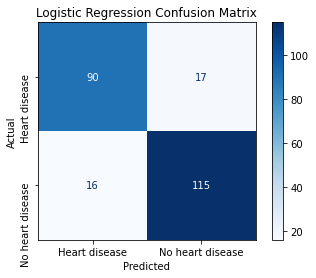

In [24]:
# Plot Logistic Regression Confusion Matrix
plot_confusion_matrix(l_reg, X_test, y_test, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1],['Heart disease','No heart disease'])
plt.yticks([0,1],['Heart disease','No heart disease'],rotation=90)
plt.show()

C:\Users\imayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


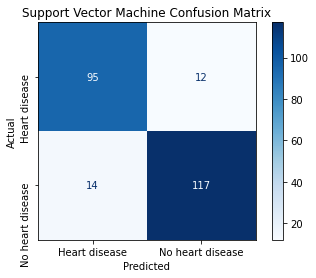

In [25]:
# Plot Support Vector Machine(SVM) Confusion Matrix
plot_confusion_matrix(svm_clf, X_test, y_test, cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1],['Heart disease','No heart disease'])
plt.yticks([0,1],['Heart disease','No heart disease'],rotation=90)
plt.show()

C:\Users\imayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


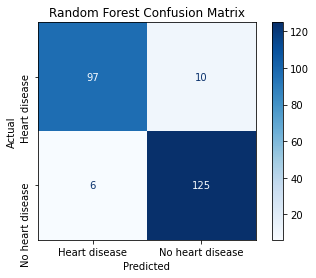

In [26]:
# Plot Random Forest Confusion Matrix
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1],['Heart disease','No heart disease'])
plt.yticks([0,1],['Heart disease','No heart disease'],rotation=90)
plt.show()

C:\Users\imayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


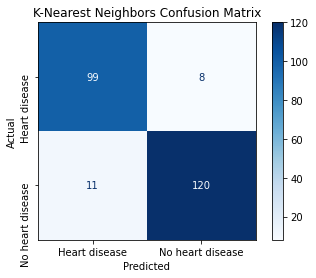

In [27]:
# Plot K-Nearest Neighbors Confusion Matrix
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1],['Heart disease','No heart disease'])
plt.yticks([0,1],['Heart disease','No heart disease'],rotation=90)
plt.show()

C:\Users\imayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


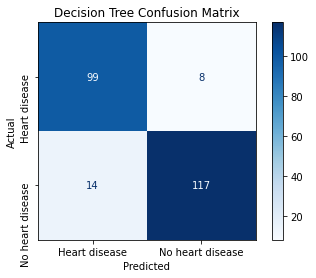

In [28]:
# Plot Decision Tree Confusion Matrix
plot_confusion_matrix(dt, X_test, y_test, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1],['Heart disease','No heart disease'])
plt.yticks([0,1],['Heart disease','No heart disease'],rotation=90)
plt.show()

C:\Users\imayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


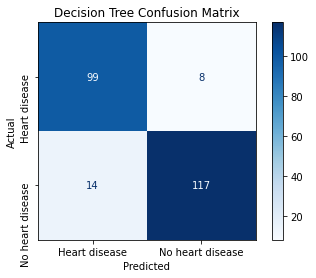

In [29]:
# Plot Decision Tree Confusion Matrix
plot_confusion_matrix(dt, X_test, y_test, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1],['Heart disease','No heart disease'])
plt.yticks([0,1],['Heart disease','No heart disease'],rotation=90)
plt.show()